# Introduction to Exploritary Data Analysis
Using Pandas!


# Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


#TO ADD A MAP AND LOCALIZATION
# import folium 
# from folium import plugins
# from tqdm.notebook import tqdm as tqdm

In [2]:
df = pd.read_csv('listings.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`


In [3]:
df.shape

(16195, 18)

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,639280827847650582,Lugar encantador en vicente lopez,461943087,Roberto,NaN,Nuñez,-34.52618,-58.48117,Entire home/apt,2880,1,0,NaN,NaN,1,364,0,NaN
1,33712571,Ambiente familiar....tranquilo,187744857,Griselda,NaN,Villa Lugano,-34.68885,-58.50478,Entire home/apt,1230,2,0,NaN,NaN,1,89,0,NaN
2,32934967,"Habitacion para viajeros, estudiantes",247809450,Sebastian,NaN,Mataderos,-34.68112,-58.51895,Private room,3697,15,0,NaN,NaN,1,365,0,NaN
3,42042076,Hotel Vicente Lopez,183363682,Bernardo,NaN,Nuñez,-34.52638,-58.47069,Private room,5500,1,6,2021-10-10,0.21,2,73,1,NaN
4,33424822,Departamento de 2 ambientes frente al río,36564453,Sandra,NaN,Nuñez,-34.51730,-58.47505,Entire home/apt,1915,15,3,2021-07-24,0.21,15,205,2,NaN


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [7]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.619500e+04,1.619500e+04,0.0,16195.000000,16195.000000,1.619500e+04,16195.000000,16195.000000,12668.000000,16195.000000,16195.000000,16195.000000
mean,9.733572e+16,1.174025e+08,NaN,-34.590816,-58.417482,9.657852e+03,7.960729,20.624699,0.933383,10.366471,205.299907,5.175548
std,2.219957e+17,1.270372e+08,NaN,0.019230,0.030608,1.159012e+05,29.585706,37.485966,1.037568,22.010083,124.778288,9.098700
min,1.150800e+04,1.342600e+04,NaN,-34.693700,-58.544370,2.600000e+02,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.154968e+07,1.170482e+07,NaN,-34.601490,-58.436730,3.345000e+03,2.000000,1.000000,0.210000,1.000000,89.000000,0.000000
50%,3.583924e+07,6.350721e+07,NaN,-34.590200,-58.419050,4.806000e+03,3.000000,6.000000,0.580000,2.000000,194.000000,1.000000
75%,5.115975e+07,1.950067e+08,NaN,-34.580710,-58.392930,7.394000e+03,5.000000,23.000000,1.280000,7.000000,333.000000,6.000000
max,6.537220e+17,4.652434e+08,NaN,-34.513990,-58.355410,1.219994e+07,1000.000000,546.000000,13.470000,131.000000,365.000000,110.000000


# Step 2: Data PrepAration
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [8]:
# Example of dropping columns
# df.drop(['Opening date'], axis=1)

In [9]:
df = df[[
#     'id', 
         'name', 'host_id', 'host_name',
#          'neighbourhood_group',
       'neighbourhood',
#          'latitude', 'longitude',
         'room_type', 'price',
       'minimum_nights', 
#     'number_of_reviews', 
#          'last_review',
#        'reviews_per_month', 
#          'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'
#          'license'
        ]].copy()

In [10]:
df

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
0,Lugar encantador en vicente lopez,461943087,Roberto,Nuñez,Entire home/apt,2880,1,364,0
1,Ambiente familiar....tranquilo,187744857,Griselda,Villa Lugano,Entire home/apt,1230,2,89,0
2,"Habitacion para viajeros, estudiantes",247809450,Sebastian,Mataderos,Private room,3697,15,365,0
3,Hotel Vicente Lopez,183363682,Bernardo,Nuñez,Private room,5500,1,73,1
4,Departamento de 2 ambientes frente al río,36564453,Sandra,Nuñez,Entire home/apt,1915,15,205,2
...,...,...,...,...,...,...,...,...,...
16190,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,Dique 3,Entire home/apt,17252,3,60,4
16191,"Beathtaking views, pool, jacuzzi",22521769,Berni,Dique 2,Entire home/apt,9436,2,219,0
16192,"Luxury Apartment in Buenos Aires, Puerto Madero",87714052,Estefania,Dique 3,Entire home/apt,7394,14,365,0
16193,Hermoso departamento en Puerto Madero/PISCINA/GYM,137667992,Valeria,Dique 3,Entire home/apt,6162,2,173,23


In [11]:
# Changing the type value
# df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [12]:
# Counting how many na are in the db
df.isna().sum()

name                     4
host_id                  0
host_name                2
neighbourhood            0
room_type                0
price                    0
minimum_nights           0
availability_365         0
number_of_reviews_ltm    0
dtype: int64

In [13]:
# Changing na values to zero
# df = df.fillna(0)

# dropping na values
df = df.dropna()

In [14]:
# Searching for duplicated rows
# df.duplicated()

# Searching for wich is a duplicated row
df.loc[df.duplicated()].head(5)

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
558,BUENOS AIRES DOWNTON,4216433,Cristina,San Telmo,Private room,4683,3,365,0
1410,"Great shared room, awesome house.",14926827,Mariano,San Cristobal,Shared room,2000,2,365,0
2656,Epico Recoleta Hotel - Standard room,71150934,Epico Recoleta,Recoleta,Hotel room,9049,3,360,0
4303,Apartment near Attractions in City Full Amenities,38398191,Martin,Retiro,Entire home/apt,9242,1,0,0
7533,"Shared Dormitory, Mixed Dorm, 6 Beds",87197898,Alberto,Recoleta,Hotel room,1232,3,365,0


In [15]:
# Check for duplicate with bool
# df.duplicated()

# Check for duplicate name with a subset
df.loc[df.duplicated(subset=['name'])]

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
152,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7394,14,364,3
184,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7394,14,364,1
222,"In the heart of Palermo, Soho Point",1409800,Mariano,Palermo,Entire home/apt,8450,1,345,9
384,"5 stars studios in Palermo,new!",444416,Claudia,Palermo,Entire home/apt,2465,3,197,6
401,PRIVATE BEDROOM SINGLE BED,1388769,Juan Y Josefina,Balvanera,Private room,1479,5,237,0
...,...,...,...,...,...,...,...,...,...
16080,HABITACION COMPARTIDA EN RESIDENCIA DE ESTUDIA...,416972212,Joaquin,Monserrat,Shared room,1429,28,365,0
16089,Hermoso departamento en complejo residencial,464653751,Cristian,Caballito,Private room,1900,3,358,0
16126,Lo de Pablo,279821426,Daniela Fernanda,Nuñez,Hotel room,10392,1,365,0
16130,Lovely studio in Palermo,441482178,Santiago,Palermo,Entire home/apt,3644,1,341,0


In [16]:
# Checking an example duplicate
df.query('name == "Amazing view - GREAT Studio - Balcony"')

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
17,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7394,14,270,3
152,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7394,14,364,3
184,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7394,14,364,1
6966,Amazing view - GREAT Studio - Balcony,530261,Luciano,Palermo,Entire home/apt,7235,14,204,5


In [17]:
# Selecting the data that its not duplicated to set a "new" df.
df = df.loc[~df.duplicated(subset=['host_id','host_name','neighbourhood','room_type'])] \
.reset_index(drop=True).copy()

In [18]:
df

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
0,Lugar encantador en vicente lopez,461943087,Roberto,Nuñez,Entire home/apt,2880,1,364,0
1,Ambiente familiar....tranquilo,187744857,Griselda,Villa Lugano,Entire home/apt,1230,2,89,0
2,"Habitacion para viajeros, estudiantes",247809450,Sebastian,Mataderos,Private room,3697,15,365,0
3,Hotel Vicente Lopez,183363682,Bernardo,Nuñez,Private room,5500,1,73,1
4,Departamento de 2 ambientes frente al río,36564453,Sandra,Nuñez,Entire home/apt,1915,15,205,2
...,...,...,...,...,...,...,...,...,...
11026,MADERO Luxury Dúplex with best views & amenities,436263119,Luxury Duplex,Dique 3,Entire home/apt,20246,1,337,15
11027,Luxury APT in PUERTO MADERO! GREAT OFFER!!!!!!...,628818,Sandra,Dique 4,Entire home/apt,13555,3,19,0
11028,"Luxury Apartment in Buenos Aires, Puerto Madero",87714052,Estefania,Dique 3,Entire home/apt,7394,14,365,0
11029,Hermoso departamento en Puerto Madero/PISCINA/GYM,137667992,Valeria,Dique 3,Entire home/apt,6162,2,173,23


In [19]:
# After searching again, there still are duplicated rows. So we clean them.
df.query('name == "Apartment in Las Cañitas"')

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
583,Apartment in Las Cañitas,6407179,Josefina,Palermo,Entire home/apt,4929,7,61,1
843,Apartment in Las Cañitas,12984628,Arturo,Palermo,Entire home/apt,5545,3,78,7


In [20]:
df = df.loc[~df.duplicated(subset=['name'])] \
.reset_index(drop=True).copy()

In [21]:
df

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,availability_365,number_of_reviews_ltm
0,Lugar encantador en vicente lopez,461943087,Roberto,Nuñez,Entire home/apt,2880,1,364,0
1,Ambiente familiar....tranquilo,187744857,Griselda,Villa Lugano,Entire home/apt,1230,2,89,0
2,"Habitacion para viajeros, estudiantes",247809450,Sebastian,Mataderos,Private room,3697,15,365,0
3,Hotel Vicente Lopez,183363682,Bernardo,Nuñez,Private room,5500,1,73,1
4,Departamento de 2 ambientes frente al río,36564453,Sandra,Nuñez,Entire home/apt,1915,15,205,2
...,...,...,...,...,...,...,...,...,...
10858,MADERO Luxury Dúplex with best views & amenities,436263119,Luxury Duplex,Dique 3,Entire home/apt,20246,1,337,15
10859,Luxury APT in PUERTO MADERO! GREAT OFFER!!!!!!...,628818,Sandra,Dique 4,Entire home/apt,13555,3,19,0
10860,"Luxury Apartment in Buenos Aires, Puerto Madero",87714052,Estefania,Dique 3,Entire home/apt,7394,14,365,0
10861,Hermoso departamento en Puerto Madero/PISCINA/GYM,137667992,Valeria,Dique 3,Entire home/apt,6162,2,173,23


# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [22]:
# Counts how many times each value appears in the selected column.
df['neighbourhood'].value_counts()

Palermo              3065
Recoleta             1606
San Nicolas           649
Belgrano              599
Retiro                571
Balvanera             418
Almagro               416
Monserrat             410
Villa Crespo          370
San Telmo             330
Nuñez                 322
Caballito             268
Colegiales            264
Chacarita             177
Villa Urquiza         158
Constitucion          155
Puerto Madero         154
Saavedra              128
Barracas               93
San Cristobal          74
Boedo                  58
Boca                   57
Flores                 52
Villa Devoto           51
Coghlan                43
Villa Ortuzar          37
Villa Pueyrredon       36
Parque Chacabuco       35
Parque Patricios       35
Villa Del Parque       28
Parque Chas            21
Villa Santa Rita       15
Floresta               14
Paternal               14
Agronomia              14
Dique 2                12
Villa Gral. Mitre      12
Mataderos              12
Nueva Pompey

Text(0, 0.5, 'Number of available rooms')

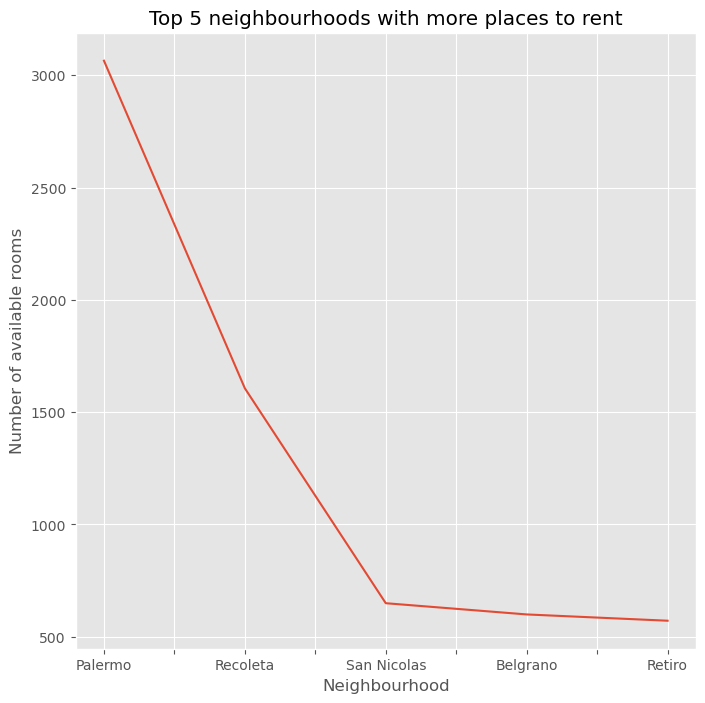

In [23]:
ax = df['neighbourhood'].value_counts() \
    .head(5) \
    .plot(kind='line', title='Top 5 neighbourhoods with more places to rent',
         figsize=(8,8))
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Number of available rooms')

In [24]:
palermo = 3065
recoleta = 1606
total_places = 10863
palermo_percentage = palermo / total_places * 100
recoleta_percentage = recoleta / total_places * 100
print(f'Palermo has the {round(palermo_percentage, 2)}% of the total places available for rent, \
while Recoleta has the {round(recoleta_percentage, 2)}% of the total places available for rent.')

Palermo has the 28.22% of the total places available for rent, while Recoleta has the 14.78% of the total places available for rent.


* #### Palermo by a huge margin is the neighbourhood with most of the places to rent (28,22%).
* #### In second place is Recoleta with near the half number of places compared to Palermo (14,78%).

In [25]:
df.describe()

,host_id,price,minimum_nights,availability_365,number_of_reviews_ltm
count,1.086300e+04,1.086300e+04,10863.000000,10863.000000,10863.000000
mean,1.277938e+08,9.585113e+03,8.257111,200.666575,4.780632
std,1.296817e+08,1.282444e+05,31.648605,125.622572,8.498878
min,1.342600e+04,2.600000e+02,1.000000,0.000000,0.000000
25%,1.820341e+07,3.200000e+03,2.000000,88.000000,0.000000
50%,8.333710e+07,4.595000e+03,3.000000,183.000000,1.000000
75%,2.101471e+08,6.954500e+03,5.000000,330.000000,6.000000
max,4.652434e+08,1.219994e+07,1000.000000,365.000000,88.000000


In [26]:
df.loc[df['price'] < 100000].describe()

,host_id,price,minimum_nights,availability_365,number_of_reviews_ltm
count,1.081100e+04,10811.000000,10811.000000,10811.000000,10811.000000
mean,1.277123e+08,6308.472667,8.137545,200.462399,4.802423
std,1.297119e+08,6562.858062,31.082113,125.532951,8.513166
min,1.342600e+04,260.000000,1.000000,0.000000,0.000000
25%,1.819678e+07,3200.000000,2.000000,88.000000,0.000000
50%,8.318485e+07,4560.000000,3.000000,182.000000,1.000000
75%,2.101471e+08,6875.000000,5.000000,329.000000,6.000000
max,4.652434e+08,98585.000000,1000.000000,365.000000,88.000000


* #### Between the price = \$1.000.000 and price = \\$100.000 there are 52 only rows of 10.000, so we can depreciate that values for further analysis.


In [27]:
df.loc[df['price'] < 50000].describe()

,host_id,price,minimum_nights,availability_365,number_of_reviews_ltm
count,1.077400e+04,10774.000000,10774.000000,10774.000000,10774.000000
mean,1.277492e+08,6095.220995,8.137925,200.269631,4.815110
std,1.296602e+08,5386.961134,31.122165,125.513941,8.523602
min,1.342600e+04,260.000000,1.000000,0.000000,0.000000
25%,1.820341e+07,3187.000000,2.000000,88.000000,0.000000
50%,8.337833e+07,4560.000000,3.000000,182.000000,1.000000
75%,2.101471e+08,6778.000000,5.000000,329.000000,6.000000
max,4.652434e+08,49293.000000,1000.000000,365.000000,88.000000


* #### Around $6000 is the price expected to pay for a night if we look the mean of the prices

In [28]:
# value count of prices
# df['price'].value_counts()
# value count of the prices rounded 
round(df['price'],-2).value_counts().head(10)

3700    493
4300    442
4900    424
3100    399
6200    362
5500    359
2500    316
3000    229
3900    200
1200    198
Name: price, dtype: int64

Text(0, 0.5, 'Prices per night ($Arg)')

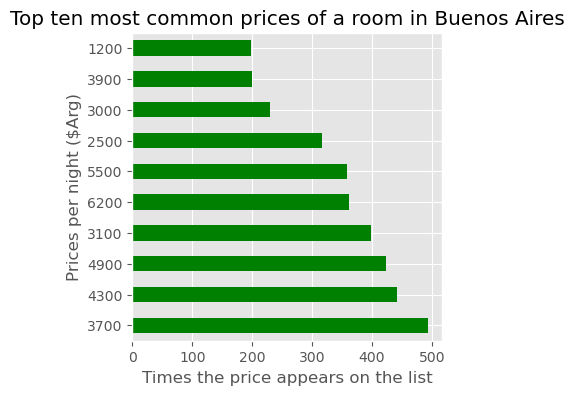

In [29]:
ax = round(df['price'], -2).value_counts().head(10) \
.plot(kind='barh',
title='Top ten most common prices of a room in Buenos Aires',
color='green',
figsize=(4,4))
ax.set_xlabel('Times the price appears on the list')
ax.set_ylabel('Prices per night ($Arg)')

* #### Around \$4000 is the price we can expect to pay for a night, \\$2000 less than the expected.

In [30]:
# value count of room types
df['room_type'].value_counts()

Entire home/apt    9341
Private room       1355
Shared room         131
Hotel room           36
Name: room_type, dtype: int64

Text(0, 0.5, 'Number of rooms available')

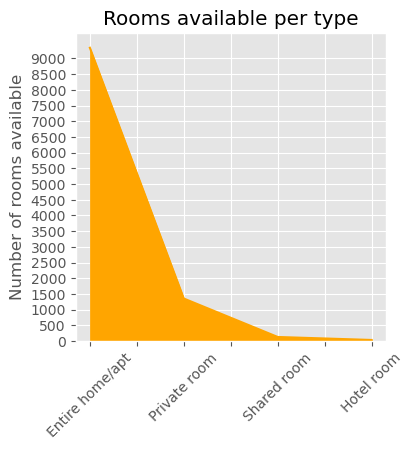

In [31]:
df['room_type'].value_counts().plot(kind='area',
#                           kind='hist', bins=20,
                          title='Rooms available per type',
                                             color='orange',
                                                 figsize=(4,4))
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 9500, 500))
plt.ylabel('Number of rooms available')

* #### By a huge margin, entire homes or apartments are the most common places to rent in Buenos Aires.

Text(0, 0.5, '')

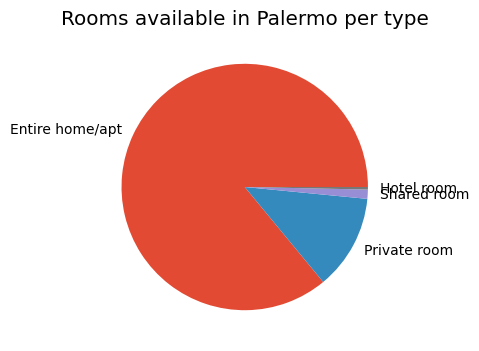

In [32]:
df['room_type'].value_counts().\
plot(kind='pie',
      x='neighbourhood',
      y=df.loc[df['neighbourhood'] == 'Palermo'],
      title='Rooms available in Palermo per type',
      figsize=(4,4))
# plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 9500, 500))
plt.ylabel('')

* #### In Palermo, the neighbourhood with most of the places to rent, the apartments and homes are predominant.

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

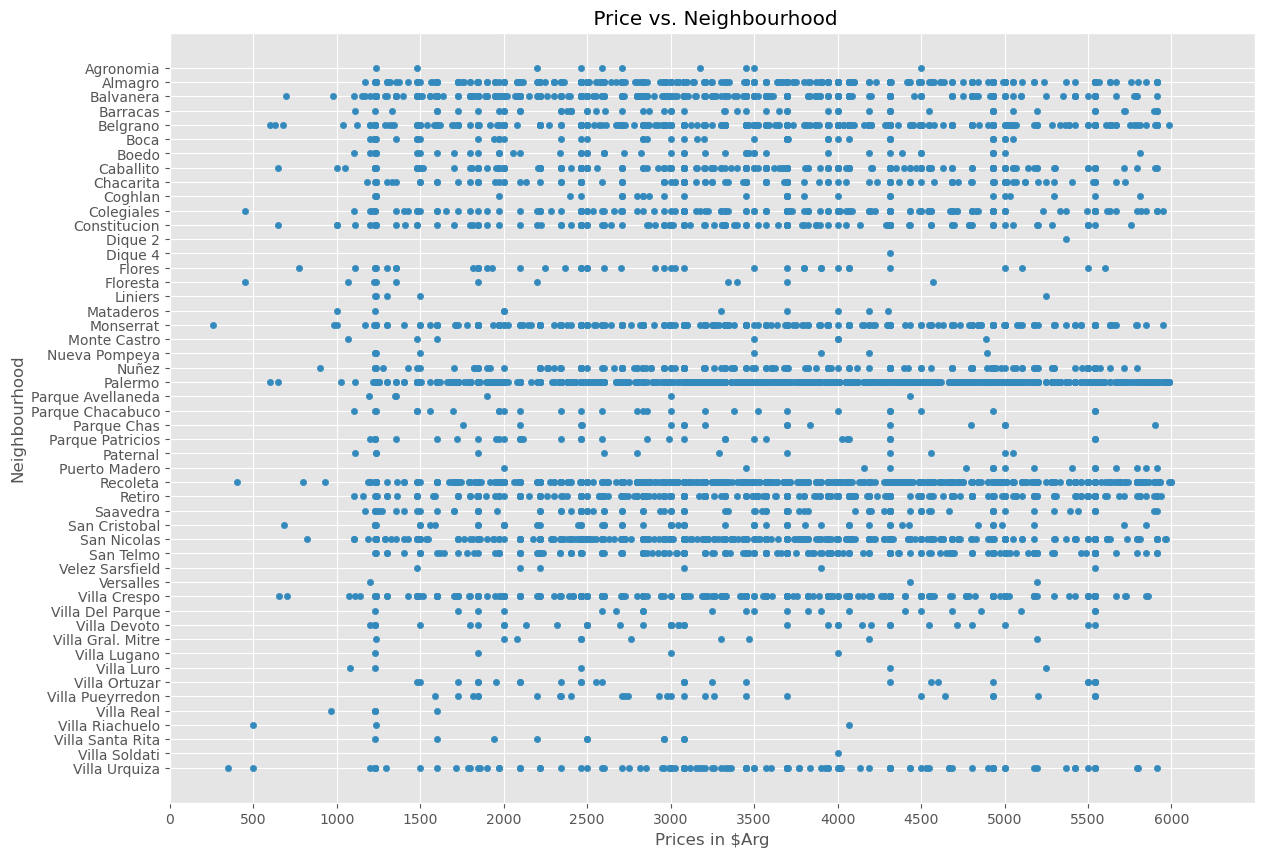

In [33]:
df.query('price < 6000').sort_values('neighbourhood',ascending=False).plot(kind='scatter',
        y='neighbourhood',
        x='price',
#         c='room_type',
#         colormap='viridis',
        figsize=(14,10),
        title=' Price vs. Neighbourhood')
plt.xlim(0,6500) # max of $5000 for the price
plt.xlabel('Prices in $Arg')
plt.ylabel('Neighbourhood')
# plt.yticks(rotation=90)
plt.xticks(np.arange(0, 6500, 500))
plt.show()

* #### We can see that Palermo and Recoleta are the neighbourhoods with more places to rent than any other.

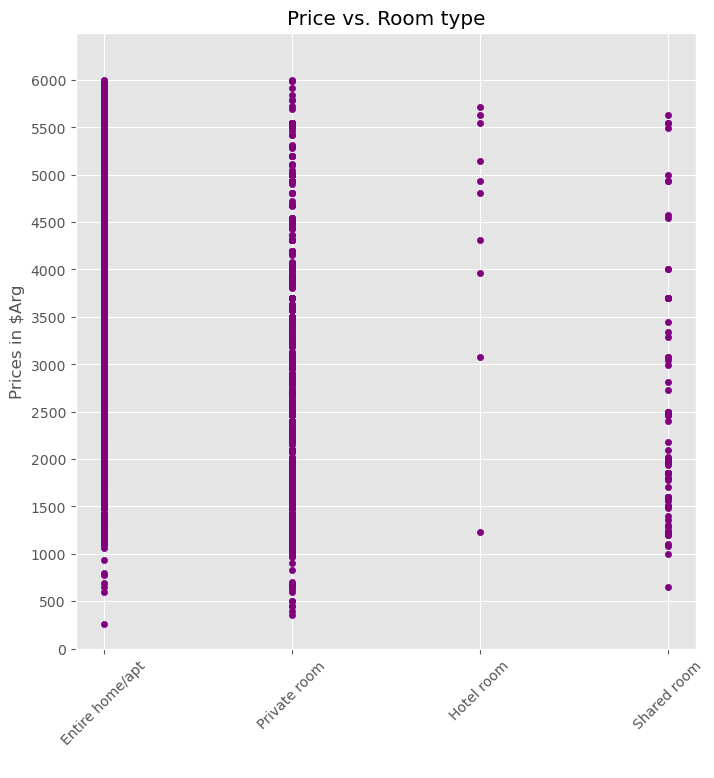

In [34]:
df.query('price < 6000').plot(kind='scatter',
        x='room_type',
        y='price',
#         c='price',
        color='purple',
        figsize=(8,8),
        title='Price vs. Room type')
plt.ylim(0,6500) # limit of $100000 for the price
plt.yticks(np.arange(0, 6500, 500)) # changes scale on the y-axis 
plt.ylabel('Prices in $Arg')
plt.xlabel(' ')
plt.xticks(rotation=45)
plt.show()

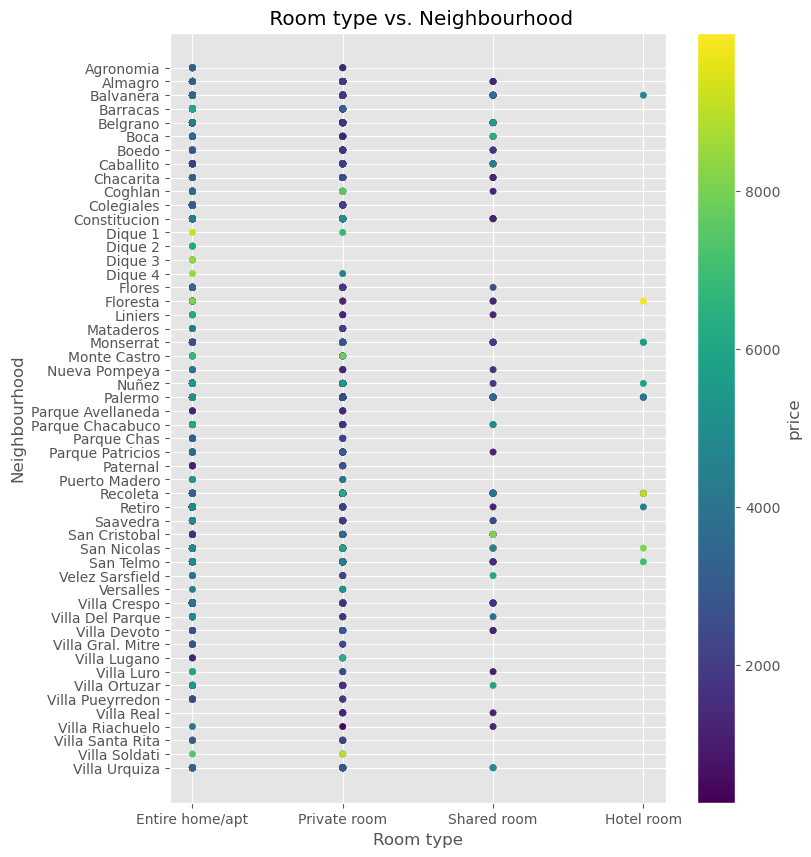

In [35]:
fig, ax = plt.subplots() # With this we can obtain the ax to show the label on the graph

df.loc[df['price'] < 10000].sort_values('neighbourhood', ascending=False).plot(kind='scatter',
        y='neighbourhood',
        x='room_type',
        c='price',
        colormap='viridis',
        figsize=(8,10),
        title=' Room type vs. Neighbourhood',
        ax = ax)
# plt.ylim(500,6000) # min of $500 and max of $6000 for the price
plt.xlabel('Room type')
plt.ylabel('Neighbourhood')
# plt.xticks(rotation=45)
# plt.yticks(np.arange(500, 6000, 500))
plt.show()

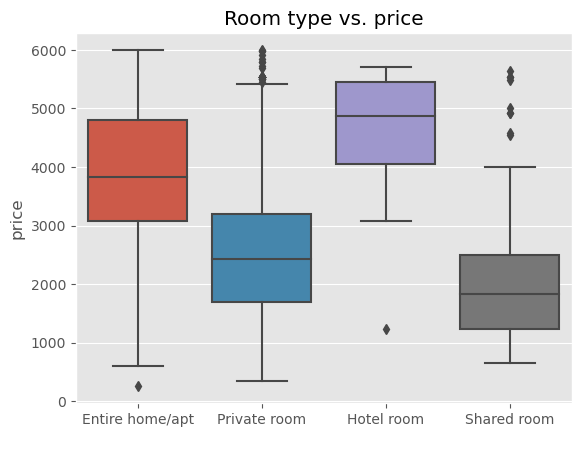

In [36]:
ax = sns.boxplot(y='price',
                x='room_type',
                # hue='availability_365',
                data=df.query('price < 6000'))
ax.set(title='Room type vs. price', xlabel=' ')
plt.show()

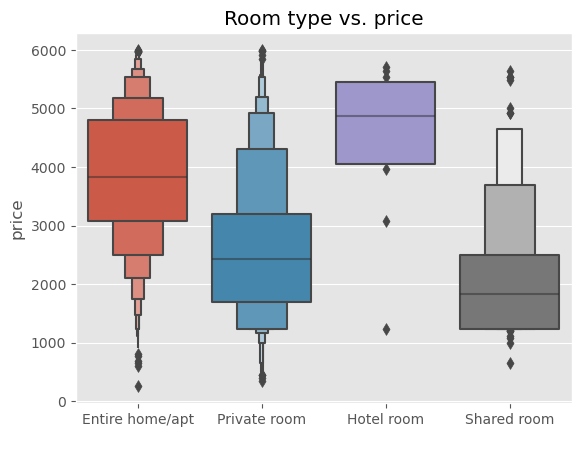

In [37]:
ax = sns.boxenplot(y='price',
                x='room_type',
                # hue='availability_365',
                data=df.query('price < 6000'))
ax.set(title='Room type vs. price', xlabel=' ')
plt.show()

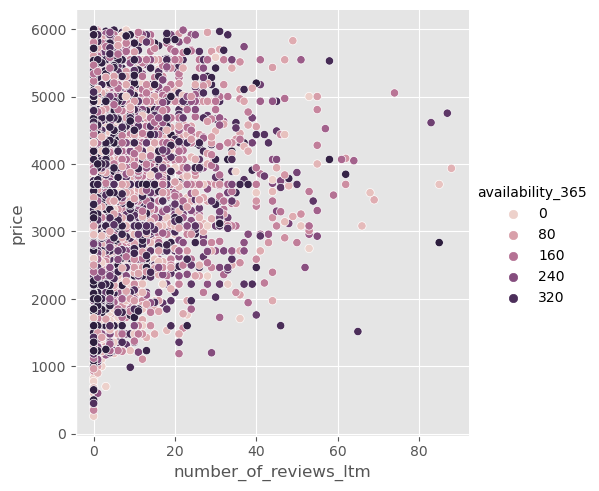

In [38]:
ax = sns.relplot(y='price',
                x='number_of_reviews_ltm',
                hue='availability_365',
                data=df.query('price < 6000'))
plt.show()

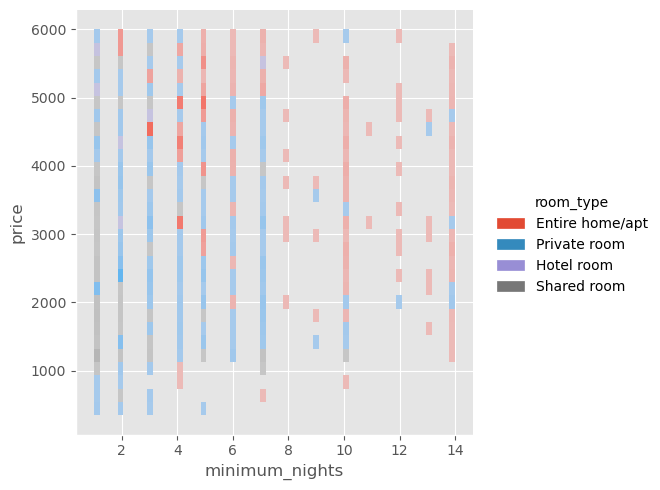

In [39]:
ax = sns.displot(y='price',
                x='minimum_nights',
                hue='room_type',
                data=df.query('price < 6000 and minimum_nights<15'))
plt.show()

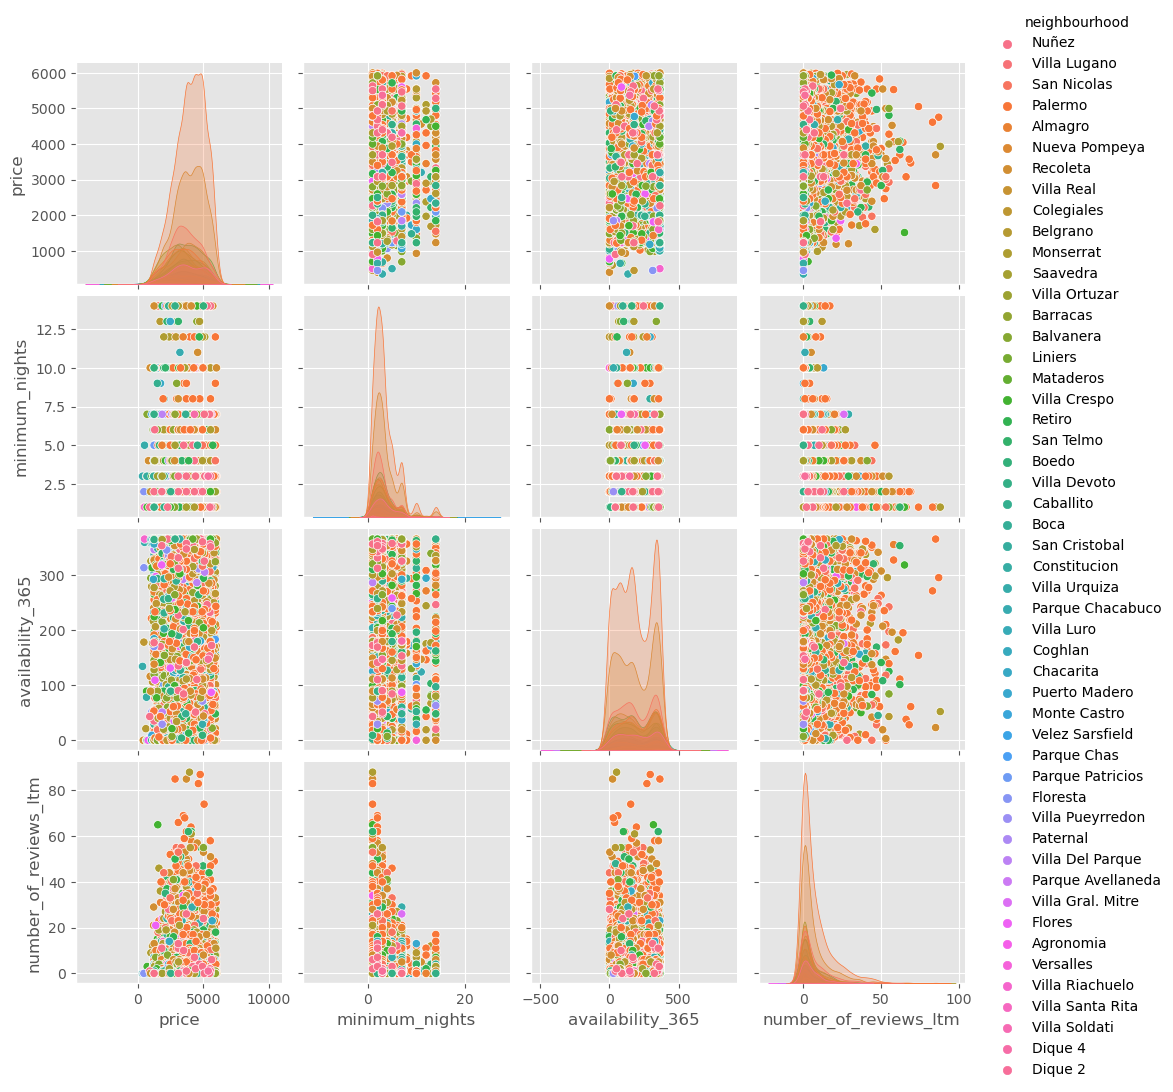

In [40]:
sns.pairplot(df.query('price < 6000 and minimum_nights <15'),
             vars=['price','minimum_nights',
                   'availability_365','number_of_reviews_ltm'],
            hue='neighbourhood')
plt.show()

In [41]:
df_corr = df.query('price < 6000 and minimum_nights <15')[['price','minimum_nights',
            'availability_365','number_of_reviews_ltm']].dropna().corr()
df_corr

,price,minimum_nights,availability_365,number_of_reviews_ltm
price,1.000000,0.004354,0.129999,0.087529
minimum_nights,0.004354,1.000000,-0.036403,-0.146274
availability_365,0.129999,-0.036403,1.000000,0.024875
number_of_reviews_ltm,0.087529,-0.146274,0.024875,1.000000


<AxesSubplot:>

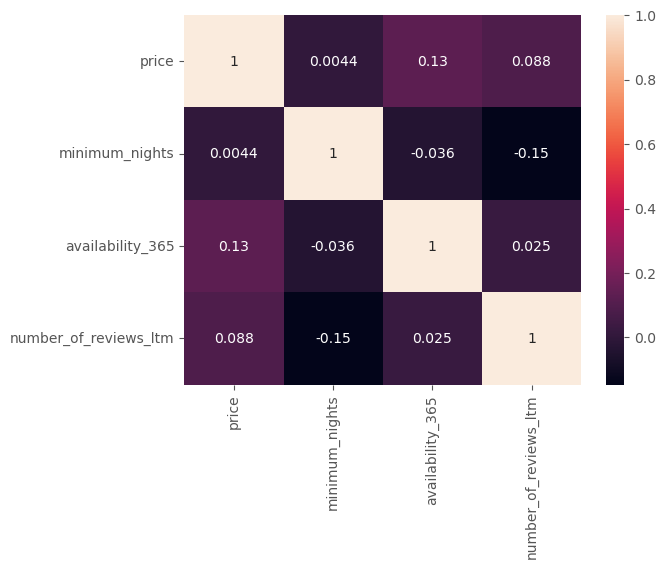

In [42]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the neighbourhoods with more rooms under \$6000? and under \\$4000?

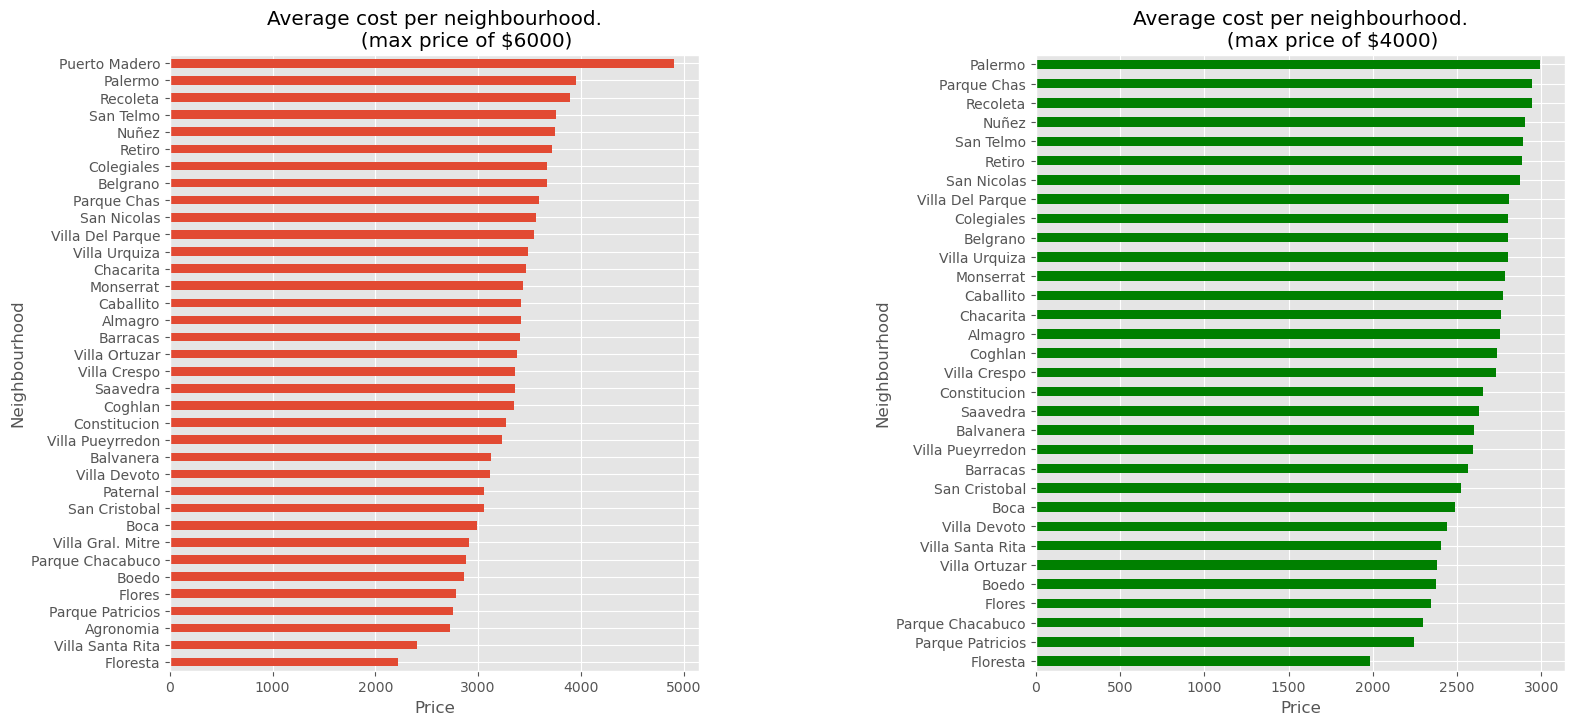

In [43]:
plt.figure(figsize=(18,8)) # A figure containing 2 graphics

plt.subplot(1,5,(1,2)) # square where the figure is set: 5places, it goes from 1 to 2
df.query('price<6000') \
    .groupby('neighbourhood')['price'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh',
          title='''Average cost per neighbourhood.
          (max price of $6000)''')
plt.ylabel("Neighbourhood")
plt.xlabel("Price")


plt.subplot(1,5,(4,5))
df.query('price<4000') \
    .groupby('neighbourhood')['price'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh',
          color = 'green',
          title='''Average cost per neighbourhood.
          (max price of $4000)''')
plt.ylabel("Neighbourhood")
plt.xlabel("Price")

plt.show()

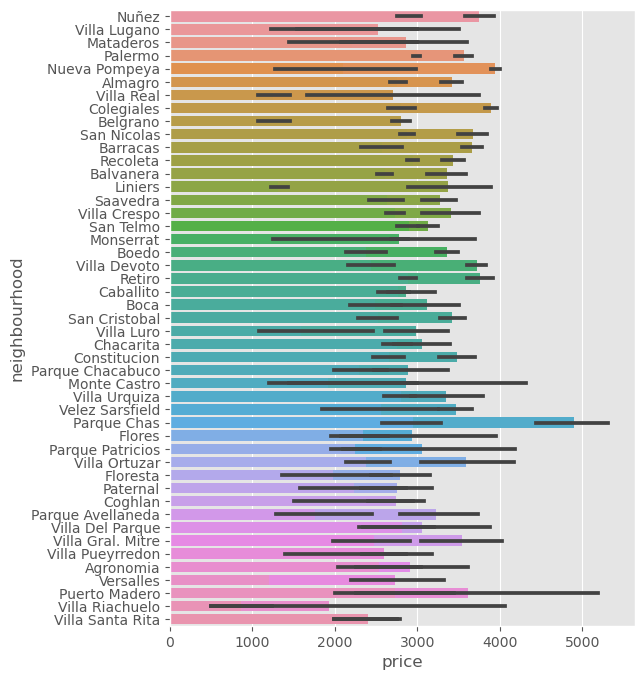

In [44]:
f, ax = plt.subplots(figsize=(6, 8))

dnf_1 = df.query('price<6000') \
    .groupby('neighbourhood')['price'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean']

dnf_2 = df.query('price<4000') \
    .groupby('neighbourhood')['price'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean']


sns.barplot(x='price',y='neighbourhood',data=df.query('price<6000'))
sns.barplot(x='price',y='neighbourhood',data=df.query('price<4000'))

plt.show()